# Overfitting and Underfitting #

In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

from learntools.core import binder
binder.bind(globals())
from learntools.deep_learning_intro.ex4 import *

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GroupShuffleSplit

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

spotify = pd.read_csv('../input/dl-course-data/spotify.csv')

X = spotify.copy().dropna()
y = X.pop('track_popularity')
artists = X['track_artist']

features_num = ['danceability', 'energy', 'key', 'loudness', 'mode',
                'speechiness', 'acousticness', 'instrumentalness',
                'liveness', 'valence', 'tempo', 'duration_ms']
features_cat = ['playlist_genre']

preprocessor = make_column_transformer(
    (StandardScaler(), features_num),
    (OneHotEncoder(), features_cat),
)

def group_split(X, y, group, train_size=0.75):
    splitter = GroupShuffleSplit(train_size=train_size)
    train, test = next(splitter.split(X, y, groups=group))
    return (X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test])

X_train, X_valid, y_train, y_valid = group_split(X, y, artists)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)
y_train = y_train / 100 # popularity is on a scale 0-100, so this rescales to 0-1.
y_valid = y_valid / 100

input_shape = [X_train.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [18]


Minimum Validation Loss: 0.1954


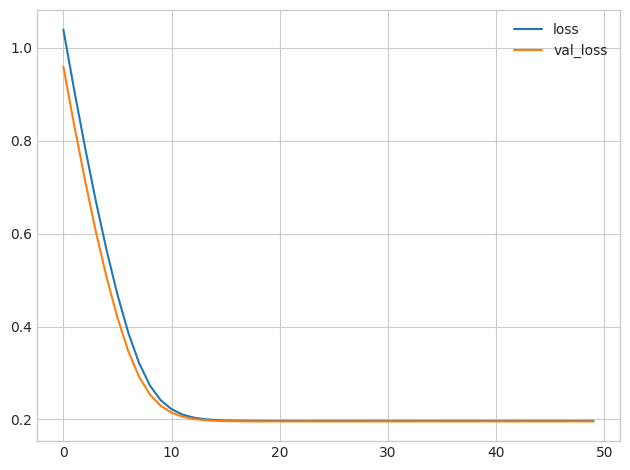

In [3]:
model = keras.Sequential([
    layers.Dense(1, input_shape=input_shape),
])
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
    verbose=0, # suppress output since we'll plot the curves
)
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

Minimum Validation Loss: 0.1954


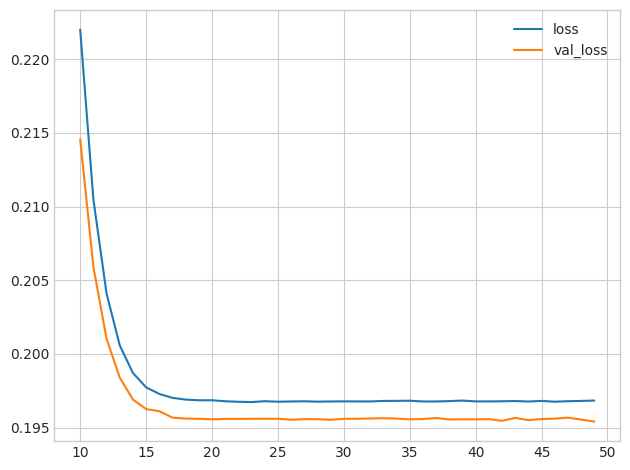

In [4]:
history_df.loc[10:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

# 1) Evaluate Baseline

In [5]:
q_1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 

The gap between these curves is quite small and the validation loss never increases, so it's more likely that the network is underfitting than overfitting. It would be worth experimenting with more capacity to see if that's the case.

Now let's add some capacity to our network. We'll add three hidden layers with 128 units each. Run the next cell to train the network and see the learning curves.

Epoch 1/50
49/49 [==============================] - 1s 9ms/step - loss: 0.2731 - val_loss: 0.2093
Epoch 2/50
49/49 [==============================] - 0s 6ms/step - loss: 0.2025 - val_loss: 0.2023
Epoch 3/50
49/49 [==============================] - 0s 6ms/step - loss: 0.1971 - val_loss: 0.2004
Epoch 4/50
49/49 [==============================] - 0s 5ms/step - loss: 0.1943 - val_loss: 0.1991
Epoch 5/50
49/49 [==============================] - 0s 5ms/step - loss: 0.1921 - val_loss: 0.1986
Epoch 6/50
49/49 [==============================] - 0s 6ms/step - loss: 0.1902 - val_loss: 0.1978
Epoch 7/50
49/49 [==============================] - 0s 6ms/step - loss: 0.1892 - val_loss: 0.1988
Epoch 8/50
49/49 [==============================] - 0s 5ms/step - loss: 0.1885 - val_loss: 0.1987
Epoch 9/50
49/49 [==============================] - 0s 5ms/step - loss: 0.1870 - val_loss: 0.1982
Epoch 10/50
49/49 [==============================] - 0s 5ms/step - loss: 0.1858 - val_loss: 0.1976
Epoch 11/50
49/49 [

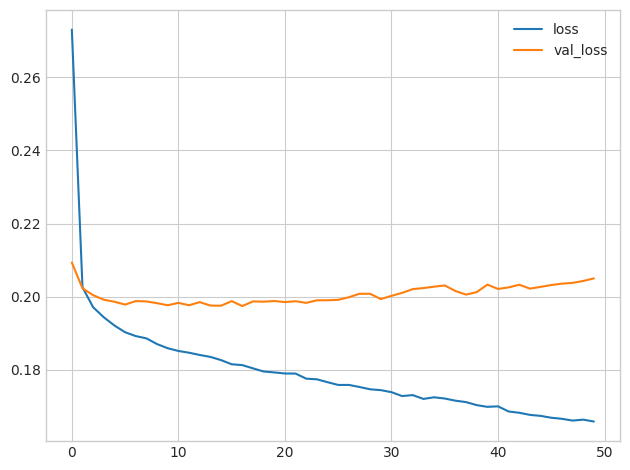

In [6]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

# 2) Add Capacity

In [7]:
q_2.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 

Now the validation loss begins to rise very early, while the training loss continues to decrease. This indicates that the network has begun to overfit. At this point, we would need to try something to prevent it, either by reducing the number of units or through a method like early stopping. (We'll see another in the next lesson!)

# 3) Define Early Stopping Callback

In [9]:
from tensorflow.keras import callbacks

early_stopping = callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)

q_3.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

Epoch 1/50
49/49 [==============================] - 1s 9ms/step - loss: 0.2289 - val_loss: 0.2047
Epoch 2/50
49/49 [==============================] - 0s 6ms/step - loss: 0.1993 - val_loss: 0.2004
Epoch 3/50
49/49 [==============================] - 0s 5ms/step - loss: 0.1953 - val_loss: 0.1992
Epoch 4/50
49/49 [==============================] - 0s 6ms/step - loss: 0.1921 - val_loss: 0.1975
Epoch 5/50
49/49 [==============================] - 0s 6ms/step - loss: 0.1905 - val_loss: 0.1978
Epoch 6/50
49/49 [==============================] - 0s 5ms/step - loss: 0.1896 - val_loss: 0.1985
Epoch 7/50
49/49 [==============================] - 0s 5ms/step - loss: 0.1884 - val_loss: 0.1994
Epoch 8/50
49/49 [==============================] - 0s 6ms/step - loss: 0.1876 - val_loss: 0.1975
Epoch 9/50
49/49 [==============================] - 0s 5ms/step - loss: 0.1863 - val_loss: 0.1972
Minimum Validation Loss: 0.1972


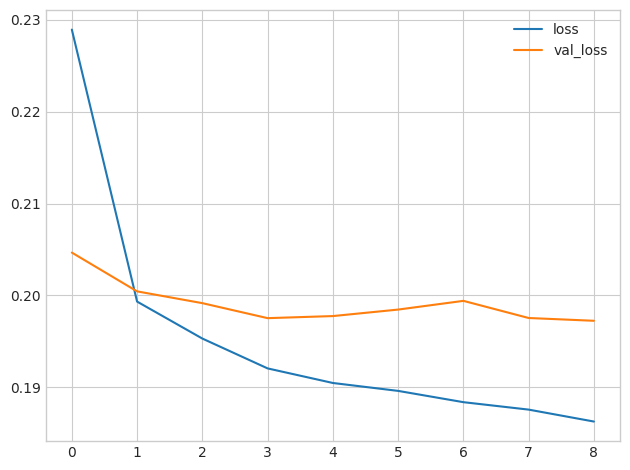

In [10]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(64, activation='relu'),    
    layers.Dense(1)
])
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
    callbacks=[early_stopping]
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

# 4) Train and Interpret

In [11]:
q_4.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 

The early stopping callback did stop the training once the network began overfitting. Moreover, by including `restore_best_weights` we still get to keep the model where validation loss was lowest.